# The impact of news on Bitcoin price variation

This analysis **(a work in progress)** is an attempt to find a corollation between bitcoin related news and the rise or fall of the bitcoin exchange rate (BTC/USD).

###DATA
####Get the Bitcoin Data
Download all the bitcoin price historical data. This can be found in http://api.bitcoincharts.com/v1/csv/
In order to get all the available data from all markets, execute the following:

    wget -A csv.gz -r -l 1 -nd http://api.bitcoincharts.com/v1/csv/
    
From this entire bitcoincharts repo, the most comprehensive catalog of data is `btceUSD.csv`.

An alternative source of data is Quandl : https://www.quandl.com/c/markets/bitcoin-data

####Unzip the package

    $: gunzip btceUSD.csv.gz




In [303]:
# Import the necessary shit
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY

# Enable inline plotting
%matplotlib inline

In [257]:
# Loading the Bitcoin PRICE data
# Format:
# EPOCH_TIMESTAMP, PRICE_VALUE, NO_FUCKING_CLUE
data_location = r'_raw_data/b7USD.csv'
# reading the CSV file while specifying headers (with the param names), 
# because there aren't any in those csv files
raw_price_data = pd.read_csv(data_location, names=['TimeStamp', 'Price', 'RandV'])

# Loading Bitcoin Transactions Volume Data (in BTC)
data_location = r'_raw_data/trans_volumes/BCHAIN-ETRAV.csv'
raw_trans_vol = pd.read_csv(data_location)

In [258]:
raw_price_data.count()

TimeStamp    5492
Price        5492
RandV        5492
dtype: int64

In [259]:
raw_trans_vol.count()

Date     2269
Value    2269
dtype: int64

In [288]:
# Add a new column DateTime that contains
# formatted date/time based on the Epoch 
# TimeStamp provided in the data set
# raw_data['DateTime'] = raw_data['TimeStamp'].apply(lambda x: time.strftime('%d-%m-%Y %H:%M:%S',  time.gmtime(x)))

# Another more efficient way of doing the 
# Timestamp to formatted date conversion
# unit='s' is to specify that the timestamp 
# was stored with the seconds unit
raw_price_data['Date'] = pd.to_datetime(raw_price_data['TimeStamp'], unit='s')

# Reset time to 00:00:00 useful in the next segment
# to remove all prices within a given day and leave 
# the last price value
raw_price_data['Date'] = raw_price_data['Date'].apply(pd.datetools.normalize_date)

# Keep last value only for each day (remove all other duplicates)
# The search for duplicates is done on the Date column
# inplace instructs the kernel not to create a copy
raw_price_data.drop_duplicates('Date', take_last=1, inplace=1)

# Sort all the data now by DESC order
# raw_price_data.sort('Date', ascending=1, inplace=1)

# Change the Date column type from object(default)
# to datetime
raw_trans_vol['Date'] = pd.to_datetime(raw_trans_vol['Date'])

# Sort all the data now by DESC order
raw_trans_vol.sort('Date', ascending=1, inplace=1)

In [294]:
# Creating a DataFrame from the Bitcoin price raw data
btcp_df = pd.DataFrame(raw_price_data, columns=['Date', 'Price'])

# Limit the Price to a range
btcp_priceSlice_df = btcp_df[(btcp_df['Date'] >= pd.datetime(2011,7,1))
                             & (btcp_df['Date'] <= pd.datetime(2011,10,6))]

# Set index
btcp_priceSlice_df = btcp_priceSlice_df.set_index('Date')

btcp_priceSlice_df.head()

,Price
Date,
2011-07-01,15.40
2011-07-02,14.63
2011-07-03,15.27
2011-07-04,14.50
2011-07-05,12.40


In [295]:
# Create a DataFrame from Trans Volume (in BTC) raw data
trans_volBTC_df = pd.DataFrame(raw_trans_vol, columns=['Date', 'Value'])

# Limit the Transaction Volume Data to a range
trans_volSlice_df = trans_volBTC_df[(trans_volBTC_df['Date'] >= pd.datetime(2011,7,1)) 
                                & (trans_volBTC_df['Date'] <= pd.datetime(2011,10,5))]

# Set index
trans_volSlice_df = trans_volSlice_df.set_index('Date')

# Show the last 5 values
trans_volSlice_df.head()

,Value
Date,
2011-07-01,101842
2011-07-02,91032
2011-07-03,44020
2011-07-04,60738
2011-07-05,86599


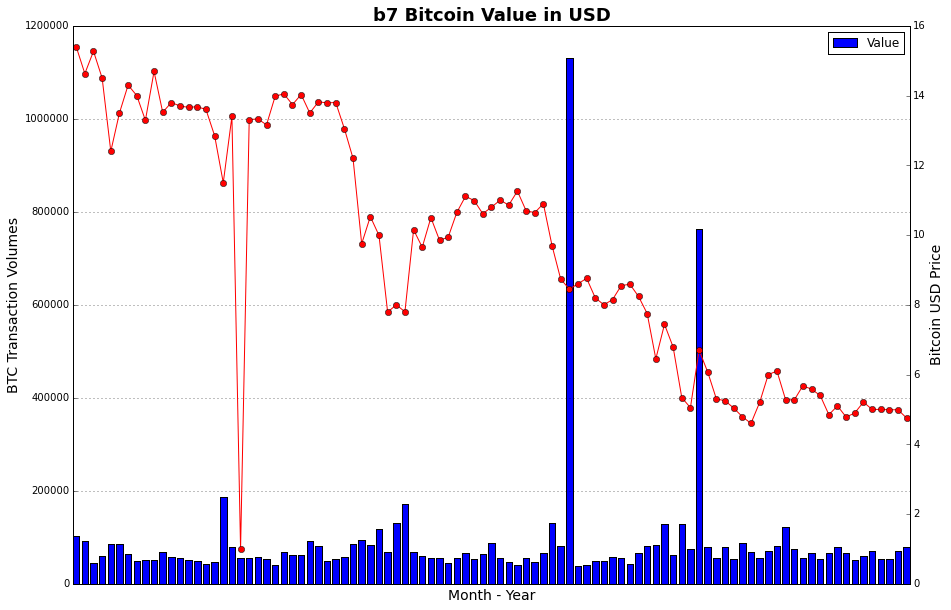

In [308]:
# Shitload of crap is happening here
# all needs to be fixed and cleaned up
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1,1,1)

trans_volSlice_df.plot(ax=ax, kind='bar', use_index=True)
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(), btcp_priceSlice_df.values, color='r', linestyle='-', marker='o', linewidth=1.0)

# The below is not working for some reason, need to figure this shit out
ax.xaxis.set_major_locator(dates.MonthLocator(bymonth=range(1,13), bymonthday=1, interval=10))
ax.xaxis.set_major_formatter(dates.DateFormatter("%b '%y"))

# Layout stuff
ax.set_title("b7 Bitcoin Value in USD", weight="bold", size=18)
ax.set_xlabel("Month - Year", size=14)
ax.set_ylabel("BTC Transaction Volumes", size=14)
ax2.set_ylabel("Bitcoin USD Price", size=14)

# Show 
plt.show()